In [2]:
!pip install opensignalsreader
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from opensignalsreader import OpenSignalsReader
import os

Processing file: sub-02_walk-ground.txt


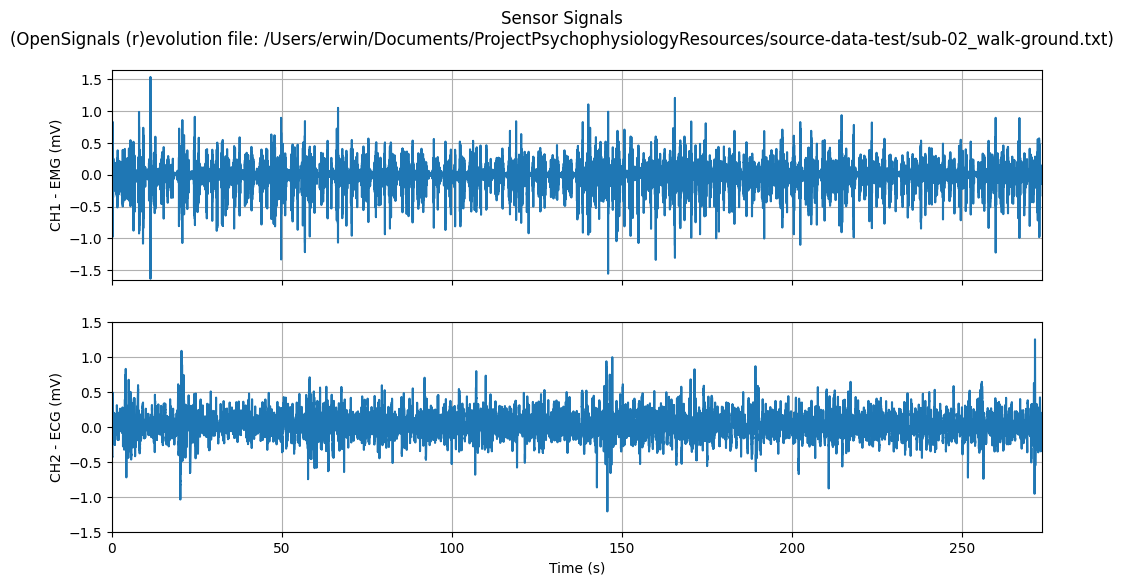

ECG Signal (first 5 elements): [ 0.01464844  0.00585937  0.         -0.00292969 -0.00585937]
EMG Signal (first 5 elements): [0.00638782 0.00638782 0.01277564 0.00958173 0.01916347]
Wrote files /Users/erwin/Documents/ProjectPsychophysiologyResources/raw-data-test/sub-02_walk-ground.txt_ecg.csv and /Users/erwin/Documents/ProjectPsychophysiologyResources/raw-data-test/sub-02_walk-ground.txt_emg.csv
Processing file: sub-01_base-high.txt


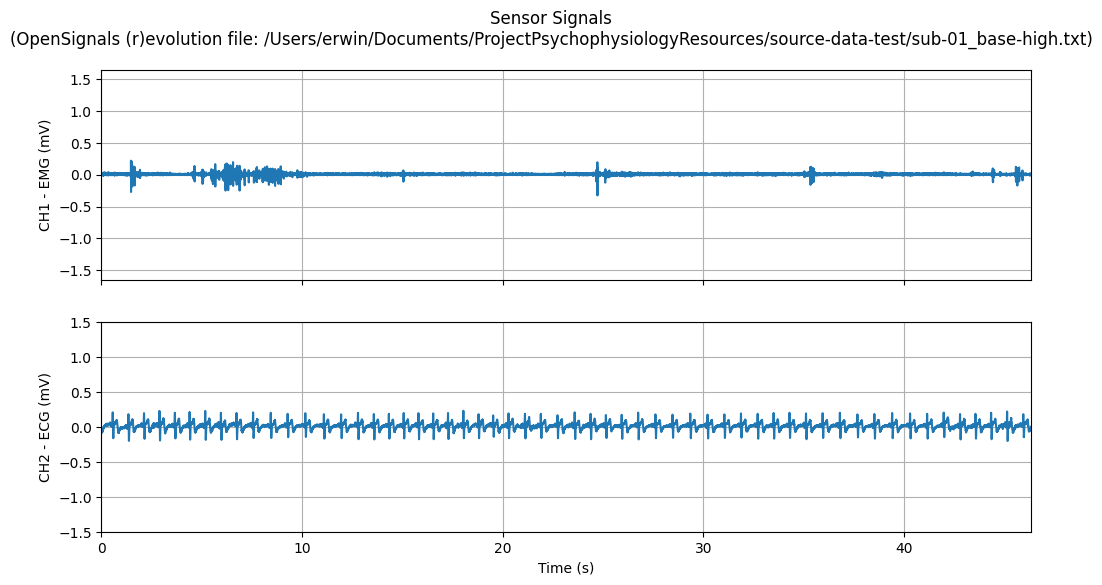

ECG Signal (first 5 elements): [-0.04101562 -0.04101562 -0.046875   -0.046875   -0.046875  ]
EMG Signal (first 5 elements): [ 0.02235738  0.01277564 -0.00319391  0.01277564  0.00958173]
Wrote files /Users/erwin/Documents/ProjectPsychophysiologyResources/raw-data-test/sub-01_base-high.txt_ecg.csv and /Users/erwin/Documents/ProjectPsychophysiologyResources/raw-data-test/sub-01_base-high.txt_emg.csv
Processing file: sub-01_base-ground.txt


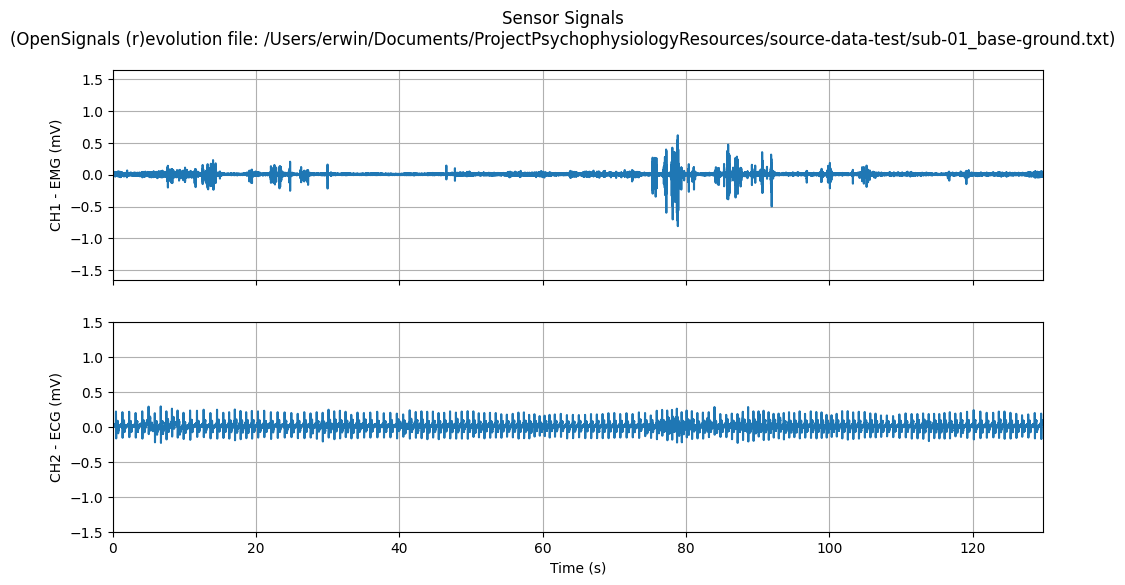

ECG Signal (first 5 elements): [0.00292969 0.00585937 0.00585937 0.00878906 0.00585937]
EMG Signal (first 5 elements): [ 0.          0.         -0.00638782 -0.00319391  0.00319391]
Wrote files /Users/erwin/Documents/ProjectPsychophysiologyResources/raw-data-test/sub-01_base-ground.txt_ecg.csv and /Users/erwin/Documents/ProjectPsychophysiologyResources/raw-data-test/sub-01_base-ground.txt_emg.csv
Processing file: sub-01_walk-ground.txt


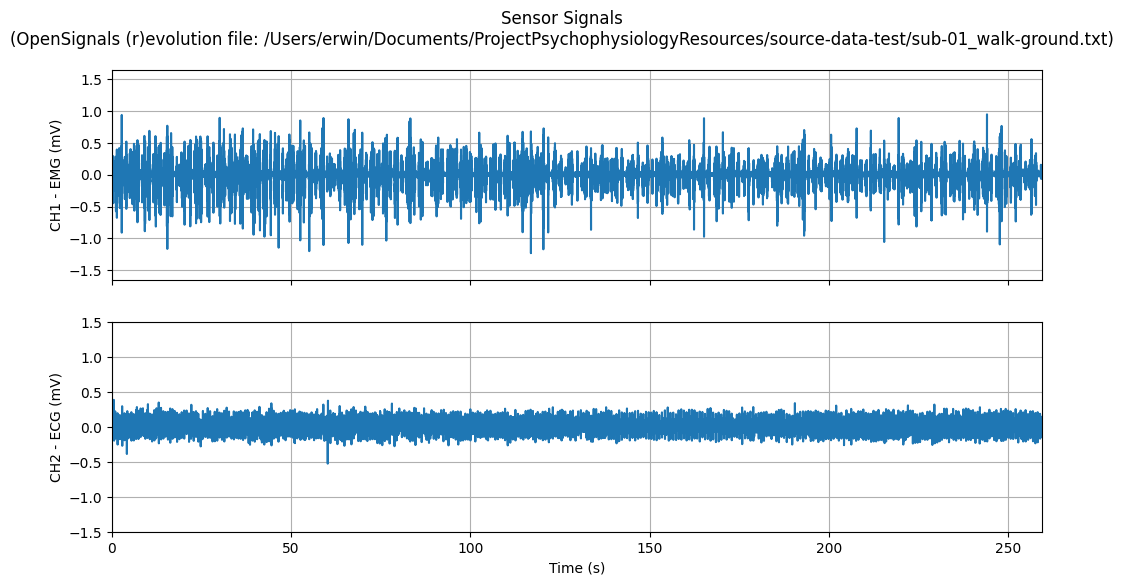

ECG Signal (first 5 elements): [0.01757812 0.01757812 0.00878906 0.00878906 0.0234375 ]
EMG Signal (first 5 elements): [ 0.06068431 -0.06068431 -0.05110258 -0.01277564 -0.07984778]
Wrote files /Users/erwin/Documents/ProjectPsychophysiologyResources/raw-data-test/sub-01_walk-ground.txt_ecg.csv and /Users/erwin/Documents/ProjectPsychophysiologyResources/raw-data-test/sub-01_walk-ground.txt_emg.csv
Processing file: SampleEDA.txt
Failed to process SampleEDA.txt: float() argument must be a string or a real number, not 'function'
Processing file: sub-02_walk-high.txt


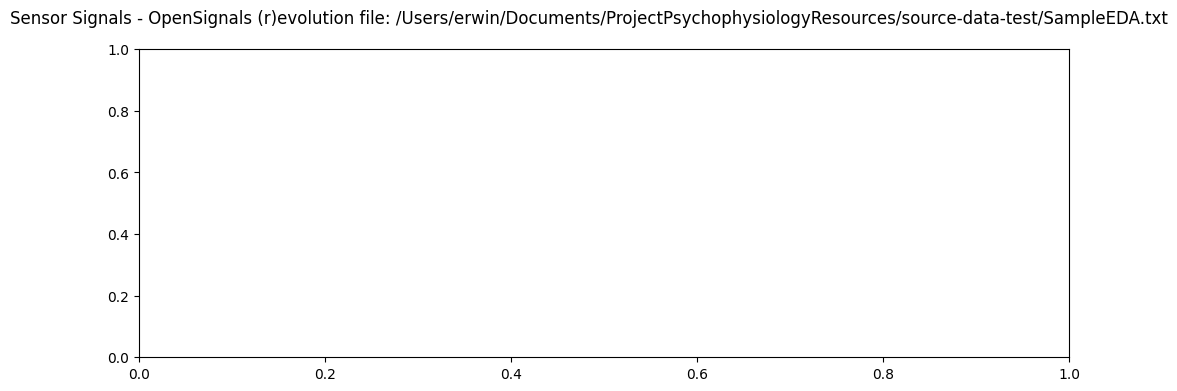

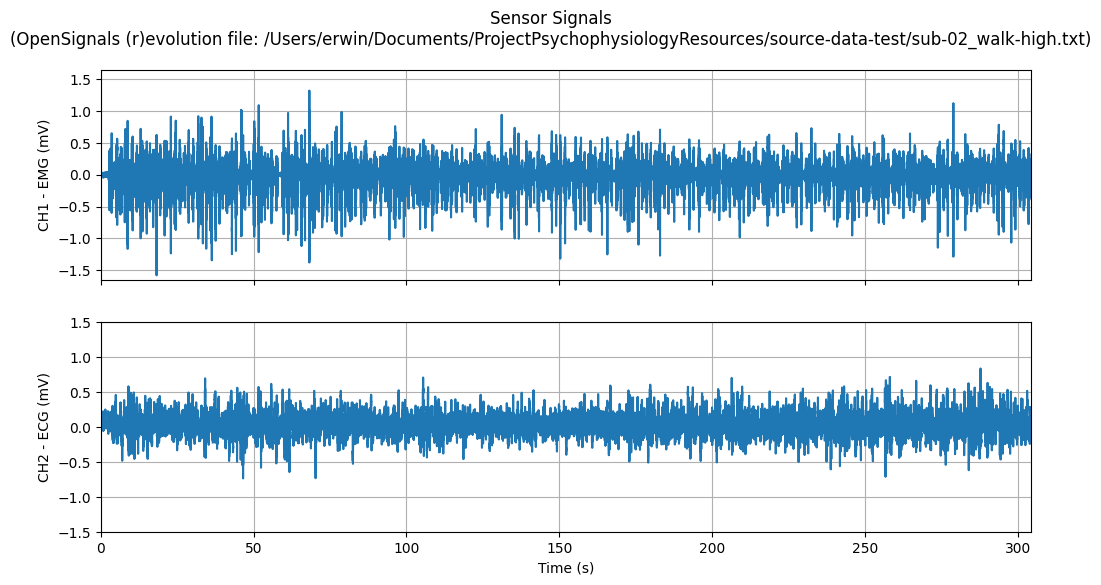

ECG Signal (first 5 elements): [0.04394531 0.03515625 0.02636719 0.02050781 0.01757812]
EMG Signal (first 5 elements): [ 0.01596956  0.00958173  0.01277564  0.00319391 -0.01916347]
Wrote files /Users/erwin/Documents/ProjectPsychophysiologyResources/raw-data-test/sub-02_walk-high.txt_ecg.csv and /Users/erwin/Documents/ProjectPsychophysiologyResources/raw-data-test/sub-02_walk-high.txt_emg.csv
Processing file: sub-01_walk-high.txt


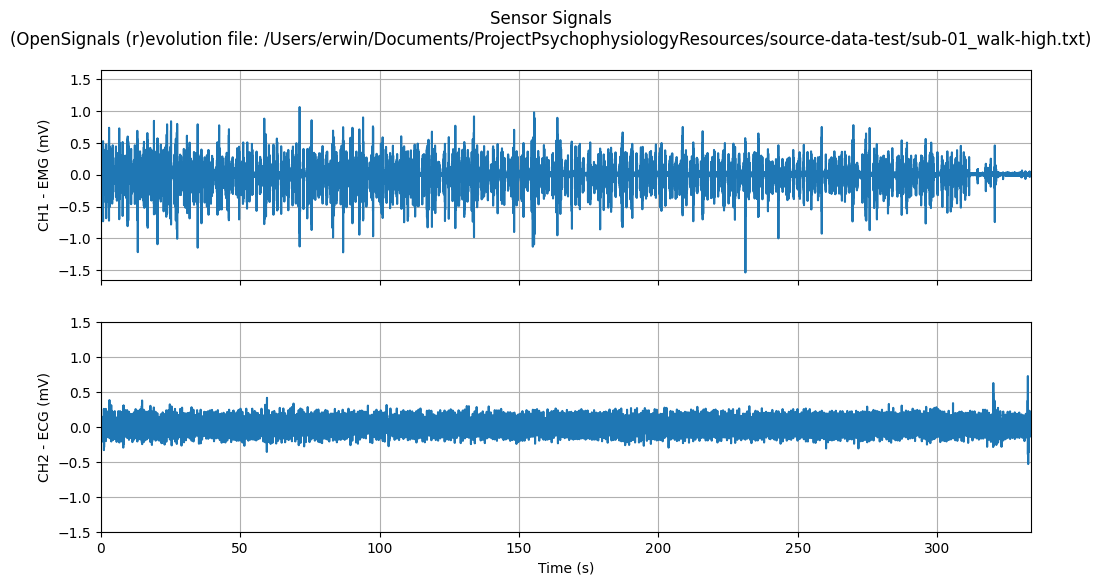

ECG Signal (first 5 elements): [-0.0703125  -0.07910156 -0.08496094 -0.09082031 -0.09375   ]
EMG Signal (first 5 elements): [0.00958173 0.00958173 0.01277564 0.01596956 0.00958173]
Wrote files /Users/erwin/Documents/ProjectPsychophysiologyResources/raw-data-test/sub-01_walk-high.txt_ecg.csv and /Users/erwin/Documents/ProjectPsychophysiologyResources/raw-data-test/sub-01_walk-high.txt_emg.csv
Processing file: sub-02_base-ground.txt


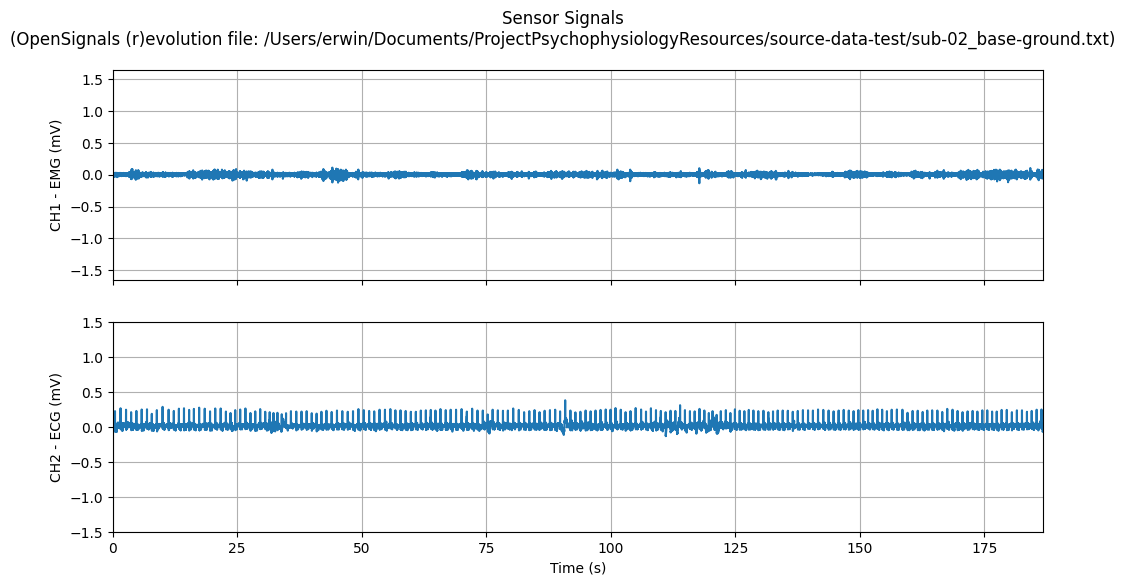

ECG Signal (first 5 elements): [0.00878906 0.00878906 0.01171875 0.01464844 0.01464844]
EMG Signal (first 5 elements): [0.0287452  0.01916347 0.01596956 0.01277564 0.01916347]
Wrote files /Users/erwin/Documents/ProjectPsychophysiologyResources/raw-data-test/sub-02_base-ground.txt_ecg.csv and /Users/erwin/Documents/ProjectPsychophysiologyResources/raw-data-test/sub-02_base-ground.txt_emg.csv


In [3]:
source_folder = "/Users/erwin/Documents/ProjectPsychophysiologyResources/source-data-test"
output_folder = "/Users/erwin/Documents/ProjectPsychophysiologyResources/raw-data-test"

os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(source_folder):
    file_path = os.path.join(source_folder, filename)
    
    if os.path.isfile(file_path):
        try:
            print(f"Processing file: {filename}")
            
            acq = OpenSignalsReader(file_path, show=True)
            
            ecg_signal = acq.signal('ECG') 
            print(f"ECG Signal (first 5 elements): {ecg_signal[:5]}")
            
            emg_signal = acq.signal('EMG') 
            print(f"EMG Signal (first 5 elements): {emg_signal[:5]}")
            
            output_filename_ecg = os.path.join(output_folder, f"{filename}_ecg.csv")
            output_filename_emg = os.path.join(output_folder, f"{filename}_emg.csv")
            
            np.savetxt(output_filename_ecg, ecg_signal, delimiter=',', header='ECG')
            np.savetxt(output_filename_emg, emg_signal, delimiter=',', header='EMG')
            
            print(f"Wrote files {output_filename_ecg} and {output_filename_emg}")
            
        except Exception as e:
            print(f"Failed to process {filename}: {e}")